In [88]:
import pandas as pd
import seaborn as sns


In [129]:
df = pd.read_csv('california_housing_train.csv')

In [38]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Проверить есть ли в файле пустые значения

In [26]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Показать median_house_value где median_income < 2

In [33]:

df.loc[ df['median_income'] < 2, ['median_house_value'] ]


,median_house_value
0,66900.0
1,80100.0
2,85700.0
4,65500.0
7,48500.0
...,...
16984,70000.0
16989,58100.0
16990,78300.0
16994,76100.0


Показать данные в первых 2 столбцах

In [27]:
df[['longitude', 'latitude']]

,longitude,latitude
0,-114.31,34.19
1,-114.47,34.40
2,-114.56,33.69
3,-114.57,33.64
4,-114.57,33.57
...,...,...
16995,-124.26,40.58
16996,-124.27,40.69
16997,-124.30,41.84
16998,-124.30,41.80


Выбрать данные где housing_median_age < 20 и
median_house_value > 70000

In [32]:
df[ (df['housing_median_age'] < 20) & (df['median_house_value'] > 70000) ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0
23,-114.98,33.82,15.0,644.0,129.0,137.0,52.0,3.2097,71300.0
...,...,...,...,...,...,...,...,...,...
16976,-124.17,40.75,13.0,2171.0,339.0,951.0,353.0,4.8516,116100.0
16983,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0
16991,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0


Определить какое максимальное и минимальное
значение median_house_value


In [84]:
print(df['median_house_value'].max())
print(df['median_house_value'].min())

500001.0
14999.0


Показать максимальное median_house_value, где
median_income = 3.1250


In [83]:
df.loc[ df['median_income'] == 3.125, ['median_house_value'] ].max()

median_house_value    380400.0
dtype: float64

Узнать какая максимальная population в зоне
минимального значения median_house_value


In [82]:
df.loc[ (df['median_house_value']) <= df['median_house_value'].min()*1.1, ['population']].max()

population    628.0
dtype: float64

# Домашнее задание

**Задача 40:** Определить среднюю стоимость дома, где кол-во людей от 0 до 500 (population)

In [85]:
df.loc[ (df['population']) < 500, ['median_house_value']    ].mean()

median_house_value    206683.836352
dtype: float64

**Задача 42:** Узнать какая максимальная households в зоне минимального значения population

In [87]:
df.loc[ (df['population']) <= df['population'].min()*1.1, ['households']].max()

households    4.0
dtype: float64

**Дополнительное задание**


У людей с наибольшим средним доходом семья состоит из 2-3 человек.

<Axes: xlabel='mean_in_family', ylabel='median_income'>

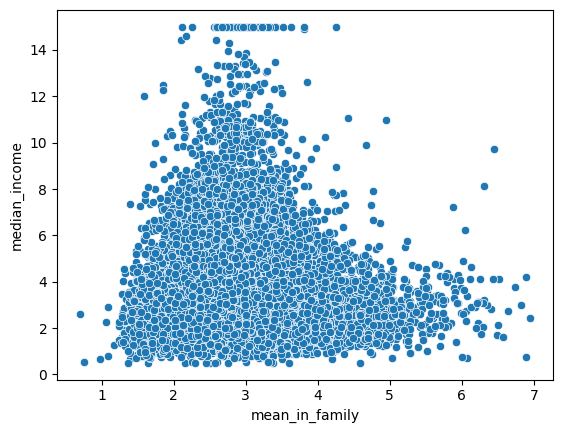

In [160]:
df['mean_in_family'] = df['population']/df['households']
df_temp = df.loc[(df['mean_in_family']) < 7,['mean_in_family','median_income']]
sns.scatterplot(data=df_temp, x="mean_in_family", y="median_income")

В Сан-Франциско и Сакраменто очень мало многодетных семей

<Axes: xlabel='longitude', ylabel='latitude'>

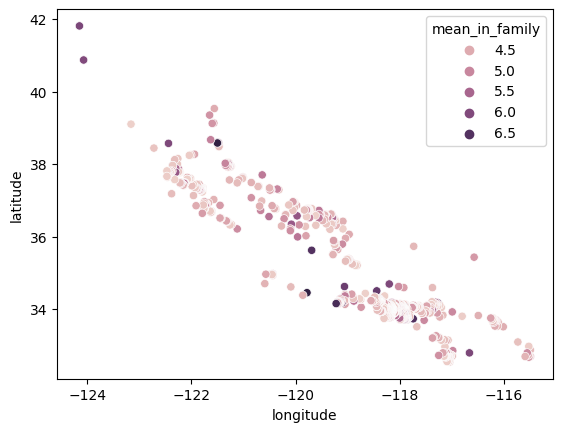

In [189]:
df_temp = df.loc[(df['mean_in_family'] < 7) & (df['mean_in_family'] > 4)]
sns.scatterplot(data=df_temp, x="longitude", y="latitude", hue='mean_in_family')
